In [54]:
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow_datasets as tfds
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [55]:
train_data, validation_data, test_data = tfds.load(
    name="imdb_reviews",
    split=('train[:60%]', 'train[60%:]', 'test'),
    as_supervised=True)

In [56]:
embedding = "https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim/1"
hub_layer = hub.KerasLayer(embedding, input_shape=[], dtype=tf.string, trainable=True)

In [57]:
train_examples_batch, train_labels_batch = next(iter(train_data.batch(10)))
train_embeddings = hub_layer(train_examples_batch).numpy()
train_labels = train_labels_batch.numpy()

In [58]:
test_examples_batch, test_labels_batch = next(iter(test_data.batch(10)))
test_embeddings = hub_layer(test_examples_batch).numpy()
test_labels = test_labels_batch.numpy()

In [59]:
model = DecisionTreeClassifier()
model.fit(train_embeddings, train_labels)

DecisionTreeClassifier()

In [60]:
predictions = model.predict(test_embeddings)
accuracy = accuracy_score(test_labels, predictions)
predictions = model.predict(test_embeddings)
accuracy = accuracy_score(test_labels, predictions)

In [61]:
accuracy = accuracy_score(test_labels, predictions)
print("Precisión: {:.2f}%".format(accuracy * 100))
cm = confusion_matrix(test_labels, predictions)

Precisión: 60.00%


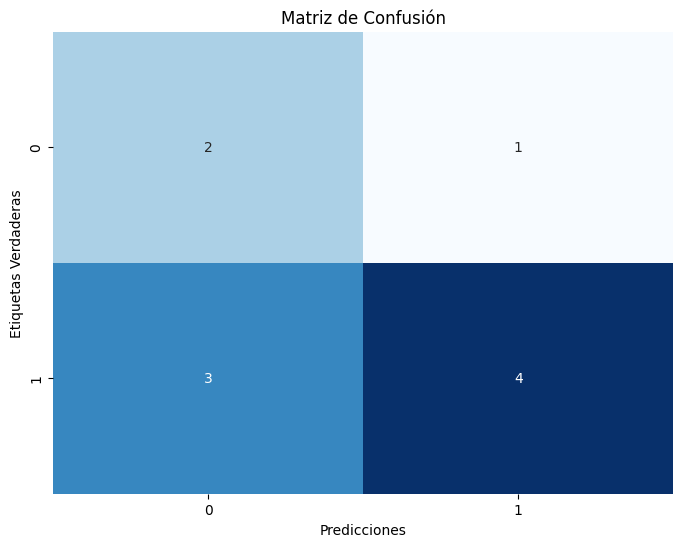

In [62]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Matriz de Confusión")
plt.xlabel("Predicciones")
plt.ylabel("Etiquetas Verdaderas")
plt.show()

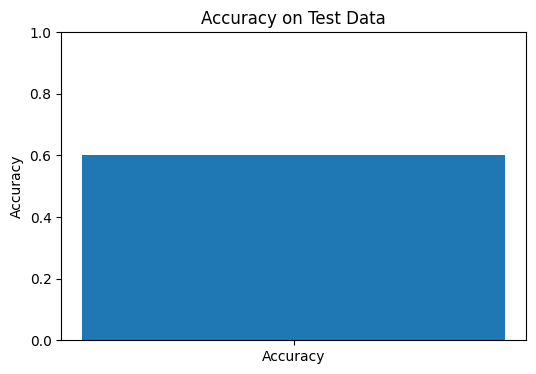

In [63]:
plt.figure(figsize=(6, 4))
plt.bar(['Accuracy'], [accuracy])
plt.ylim([0, 1])
plt.title('Accuracy on Test Data')
plt.ylabel('Accuracy')
plt.show()